### Imports

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
INPUT = '../data/eda/df_cleaned.csv'
df_original = pd.read_csv(INPUT)
df_original

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
54072568,2014-03-15 03:28:00.00000070,14.0,2014-03-15 03:28:00+00:00,-74.005272,40.740027,-73.963280,40.762555,1
54072569,2009-03-24 20:46:20.0000002,4.2,2009-03-24 20:46:20+00:00,-73.957784,40.765530,-73.951640,40.773959,1
54072570,2011-04-02 22:04:24.0000004,14.1,2011-04-02 22:04:24+00:00,-73.970505,40.752325,-73.960537,40.797342,1
54072571,2011-10-26 05:57:51.0000002,28.9,2011-10-26 05:57:51+00:00,-73.980901,40.764629,-73.870605,40.773963,1


## Feature engineering and further cleaning, preprocessing

### Renaming 'key' column to serve as id, sort by 'pickup_datetime'

In [3]:
df_original = df_original.rename(columns={'key': 'id'})
df_original['id'] = df_original['id'].astype('category')

In [4]:
df_original = df_original.sort_values(by='pickup_datetime')

In [5]:
df_original.head(20)

,id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
43116036,2009-01-01 00:00:27.0000001,30.20,2009-01-01 00:00:27+00:00,-73.782104,40.644881,-73.963565,40.676348,1
859044,2009-01-01 00:00:46.0000002,15.00,2009-01-01 00:00:46+00:00,-73.953738,40.806762,-73.989427,40.769542,1
13014640,2009-01-01 00:00:49.0000002,4.20,2009-01-01 00:00:49+00:00,-73.993185,40.727841,-73.990781,40.730007,1
645052,2009-01-01 00:01:04.0000001,5.80,2009-01-01 00:01:04+00:00,-73.995133,40.734111,-73.998232,40.722874,2
12598382,2009-01-01 00:01:04.0000003,14.60,2009-01-01 00:01:04+00:00,-73.972484,40.742743,-73.918937,40.764496,1
20119477,2009-01-01 00:01:26.0000001,6.10,2009-01-01 00:01:26+00:00,-73.985850,40.722826,-73.986301,40.739347,1
41877619,2009-01-01 00:01:31.0000001,23.80,2009-01-01 00:01:31+00:00,-73.972705,40.785866,-73.884344,40.866797,1
13154195,2009-01-01 00:01:34.0000001,4.20,2009-01-01 00:01:34+00:00,-73.988243,40.749692,-73.982899,40.751337,1
17222779,2009-01-01 00:01:56.0000003,11.40,2009-01-01 00:01:56+00:00,-73.983981,40.721738,-73.994987,40.750136,1
36022168,2009-01-01 00:01:56.0000001,160.00,2009-01-01 00:01:56+00:00,-73.943636,40.711730,-73.943638,40.711730,1


In [6]:
df_original.tail(20)

,id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
47624763,2015-06-30 23:58:39.0000006,6.00,2015-06-30 23:58:39+00:00,-73.984467,40.742828,-73.974571,40.756538,1
20857862,2015-06-30 23:58:44.0000001,16.00,2015-06-30 23:58:44+00:00,-73.959549,40.764343,-73.993073,40.730824,2
10800438,2015-06-30 23:58:58.0000004,16.50,2015-06-30 23:58:58+00:00,-73.984970,40.760277,-73.981880,40.721386,1
2149644,2015-06-30 23:59:03.0000004,11.00,2015-06-30 23:59:03+00:00,-73.969475,40.750282,-73.993965,40.751568,1
28538292,2015-06-30 23:59:09.0000007,6.50,2015-06-30 23:59:09+00:00,-73.986031,40.757202,-73.990425,40.739578,1
14868120,2015-06-30 23:59:13.0000001,10.50,2015-06-30 23:59:13+00:00,-74.002617,40.733818,-73.988991,40.758331,1
37957303,2015-06-30 23:59:14.0000007,21.54,2015-06-30 23:59:14+00:00,-73.991104,40.749706,-73.924500,40.743649,6
46405161,2015-06-30 23:59:23.0000001,19.00,2015-06-30 23:59:23+00:00,-73.993683,40.735870,-73.956268,40.726341,1
18790784,2015-06-30 23:59:25.0000001,14.50,2015-06-30 23:59:25+00:00,-73.985352,40.687199,-73.924423,40.690731,5
52901694,2015-06-30 23:59:26.0000003,8.50,2015-06-30 23:59:26+00:00,-73.985260,40.723671,-73.975899,40.746513,1


In [7]:
df_original.describe().round(2)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,54072573.00,54072573.00,54072573.00,54072573.00,54072573.00,54072573.00
mean,11.33,-73.98,40.75,-73.97,40.75,1.69
std,9.70,0.04,0.03,0.04,0.04,1.31
min,0.01,-75.00,35.06,-75.00,35.04,1.00
25%,6.00,-73.99,40.74,-73.99,40.74,1.00
50%,8.50,-73.98,40.75,-73.98,40.75,1.00
75%,12.50,-73.97,40.77,-73.97,40.77,2.00
max,978.00,-70.00,44.98,-70.00,44.98,6.00


In [8]:
df_original.isnull().sum()

id                   0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

### Feature engineering

In [9]:
df = df_original.copy()

#### Splitting and adding columns regarding dates

In [10]:
def split_date_cols(df, date_col):  
    df[date_col] = pd.to_datetime(df[date_col])
    df[f"{date_col}_dayofyear"] = df[date_col].dt.dayofyear
    df[f"{date_col}_month"] = df[date_col].dt.month
    df[f"{date_col}_year"] = df[date_col].dt.year
    df[f"{date_col}_hour"] = df[date_col].dt.hour
    df[f"{date_col}_dayofweek"] = df[date_col].dt.dayofweek
    df[f"{date_col}_is_weekend"] = df[date_col].dt.dayofweek >= 5

    df[f"{date_col}_is_late_night"] = df[f"{date_col}_hour"].between(22, 23) # 22:00 to 23:59
    df[f"{date_col}_is_night"] = df[f"{date_col}_hour"].between(0, 3)  # 00:00 to 03:59
    df[f"{date_col}_is_early_morning"] = df[f"{date_col}_hour"].between(4, 6) # 04:00 to 06:59
    df[f"{date_col}_is_rush_hour"] =  df[f"{date_col}_hour"].between(7, 8) | df[f"{date_col}_hour"].between(16, 18)
    # Drop unnecessary columns
    # df.drop(columns=[date_col], inplace=True)
    return df

In [11]:
df = split_date_cols(df, 'pickup_datetime')

### Calculating trip distance and adding it to the dataset

In [12]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in kilometers
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c  # Distance in kilometers

In [13]:
df['trip_distance'] = haversine(df['pickup_latitude'], df['pickup_longitude'],
                                 df['dropoff_latitude'], df['dropoff_longitude'])

In [14]:
df[df['trip_distance'] < 100]

,id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_dayofyear,pickup_datetime_month,pickup_datetime_year,pickup_datetime_hour,pickup_datetime_dayofweek,pickup_datetime_is_weekend,pickup_datetime_is_late_night,pickup_datetime_is_night,pickup_datetime_is_early_morning,pickup_datetime_is_rush_hour,trip_distance
43116036,2009-01-01 00:00:27.0000001,30.2,2009-01-01 00:00:27+00:00,-73.782104,40.644881,-73.963565,40.676348,1,1,1,2009,0,3,False,False,True,False,False,15.701159
859044,2009-01-01 00:00:46.0000002,15.0,2009-01-01 00:00:46+00:00,-73.953738,40.806762,-73.989427,40.769542,1,1,1,2009,0,3,False,False,True,False,False,5.114331
13014640,2009-01-01 00:00:49.0000002,4.2,2009-01-01 00:00:49+00:00,-73.993185,40.727841,-73.990781,40.730007,1,1,1,2009,0,3,False,False,True,False,False,0.314711
645052,2009-01-01 00:01:04.0000001,5.8,2009-01-01 00:01:04+00:00,-73.995133,40.734111,-73.998232,40.722874,2,1,1,2009,0,3,False,False,True,False,False,1.276494
12598382,2009-01-01 00:01:04.0000003,14.6,2009-01-01 00:01:04+00:00,-73.972484,40.742743,-73.918937,40.764496,1,1,1,2009,0,3,False,False,True,False,False,5.118060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029713,2015-06-30 23:59:46.0000001,24.5,2015-06-30 23:59:46+00:00,-73.987198,40.739059,-73.962769,40.672539,2,181,6,2015,23,1,False,True,False,False,False,7.678055
13894922,2015-06-30 23:59:48.0000002,6.0,2015-06-30 23:59:48+00:00,-73.978867,40.750820,-73.989326,40.740780,2,181,6,2015,23,1,False,True,False,False,False,1.422278
48721138,2015-06-30 23:59:48.0000003,33.5,2015-06-30 23:59:48+00:00,-73.970360,40.783756,-73.870560,40.709118,1,181,6,2015,23,1,False,True,False,False,False,11.813707
22195031,2015-06-30 23:59:52.0000001,9.5,2015-06-30 23:59:52+00:00,-73.944077,40.711658,-73.982857,40.719799,1,181,6,2015,23,1,False,True,False,False,False,3.391457


### Further cleaning - based on engineered features

In [15]:
# Trip distance is between 0.5 and 50 km
# 0.5 km is the minimum distance for a trip
df = df[(df['trip_distance'] < 50) & (df['trip_distance'] > 0.5)]

In [16]:
df[df['fare_amount'] > 300]

,id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_dayofyear,pickup_datetime_month,pickup_datetime_year,pickup_datetime_hour,pickup_datetime_dayofweek,pickup_datetime_is_weekend,pickup_datetime_is_late_night,pickup_datetime_is_night,pickup_datetime_is_early_morning,pickup_datetime_is_rush_hour,trip_distance
38471578,2010-09-16 21:35:00.000000206,320.00,2010-09-16 21:35:00+00:00,-73.999665,40.728427,-73.997323,40.719423,3,259,9,2010,21,3,False,False,False,False,False,1.020466
50693453,2010-12-19 16:35:41.0000001,400.00,2010-12-19 16:35:41+00:00,-73.883344,40.768469,-73.919316,40.772350,1,353,12,2010,16,6,True,False,False,False,True,3.059842
36883618,2011-05-22 09:02:23.0000001,430.00,2011-05-22 09:02:23+00:00,-73.973984,40.609160,-73.956937,40.605896,2,142,5,2011,9,6,True,False,False,False,False,1.484129
52150607,2011-06-02 06:49:29.0000002,444.44,2011-06-02 06:49:29+00:00,-73.997711,40.736137,-73.993440,40.741965,1,153,6,2011,6,3,False,False,False,True,False,0.741245
12402755,2011-07-23 09:04:25.0000003,400.01,2011-07-23 09:04:25+00:00,-73.902401,40.744743,-73.785857,40.638758,1,204,7,2011,9,5,True,False,False,False,False,15.343905
32518334,2011-08-26 04:09:12.0000001,343.00,2011-08-26 04:09:12+00:00,-73.939139,40.757315,-73.944263,40.752177,1,238,8,2011,4,4,False,False,False,True,False,0.716021
1185778,2011-09-08 00:32:00.00000020,488.00,2011-09-08 00:32:00+00:00,-73.999437,40.721837,-74.048855,40.731560,1,251,9,2011,0,3,False,False,True,False,False,4.302358
8348480,2011-10-03 01:17:24.0000003,315.00,2011-10-03 01:17:24+00:00,-73.948888,40.717145,-73.946920,40.722687,1,276,10,2011,1,0,False,False,True,False,False,0.638171
228222,2012-10-28 14:14:44.0000001,450.00,2012-10-28 14:14:44+00:00,-73.931985,40.793829,-73.929148,40.799672,1,302,10,2012,14,6,True,False,False,False,False,0.692212
51493994,2012-11-07 06:48:00.000000128,307.50,2012-11-07 06:48:00+00:00,-74.006152,40.739858,-74.289793,40.880762,2,312,11,2012,6,2,False,False,False,True,False,28.553931


In [17]:
df[df['trip_distance'] > 20]['fare_amount']

20429087    38.50
37461056    39.80
11663091    42.40
38900901    53.60
2274193     49.15
            ...  
12788015    57.54
15615442    57.54
42307918    57.54
23011975    57.54
9257927     57.54
Name: fare_amount, Length: 644092, dtype: float64

In [18]:
df.shape

(51811986, 19)

### Correlations

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51811986 entries, 43116036 to 9044927
Data columns (total 19 columns):
 #   Column                            Dtype              
---  ------                            -----              
 0   id                                category           
 1   fare_amount                       float64            
 2   pickup_datetime                   datetime64[ns, UTC]
 3   pickup_longitude                  float64            
 4   pickup_latitude                   float64            
 5   dropoff_longitude                 float64            
 6   dropoff_latitude                  float64            
 7   passenger_count                   int64              
 8   pickup_datetime_dayofyear         int32              
 9   pickup_datetime_month             int32              
 10  pickup_datetime_year              int32              
 11  pickup_datetime_hour              int32              
 12  pickup_datetime_dayofweek         int32              

<Axes: >

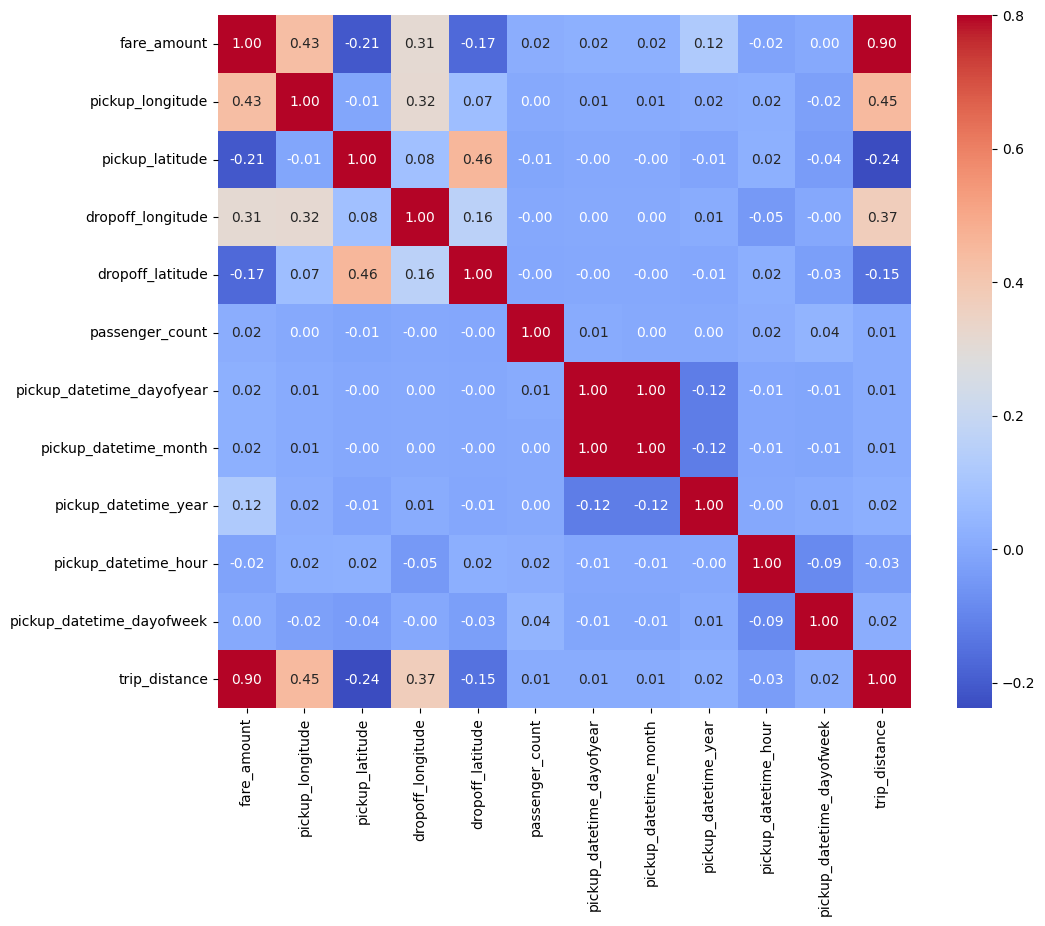

In [20]:
corrmat = df.select_dtypes(include="number").corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap="coolwarm",  annot=True, fmt=".2f", annot_kws={"size": 10})

### Boxplots after FE and cleaning

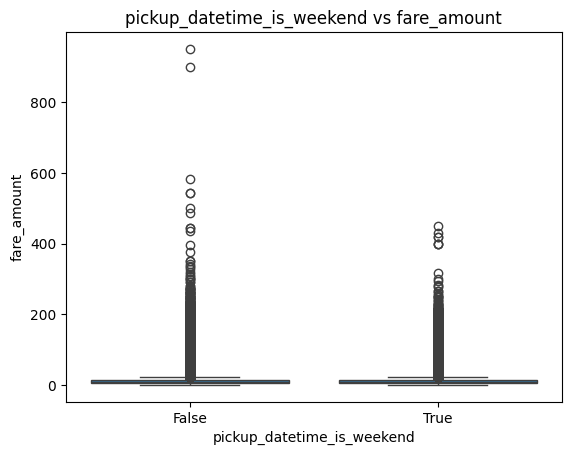

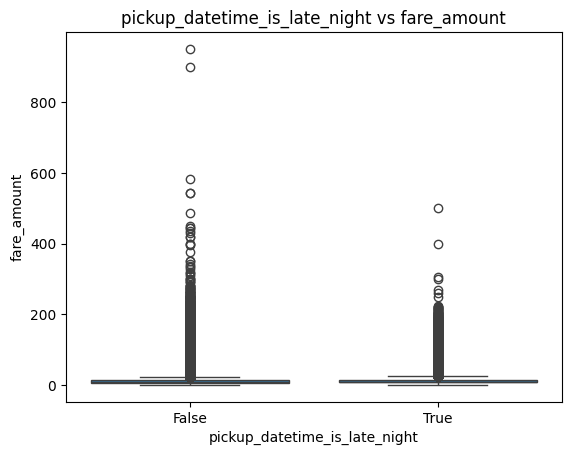

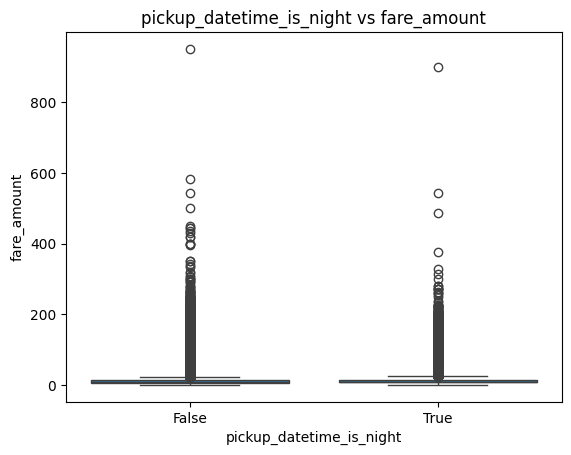

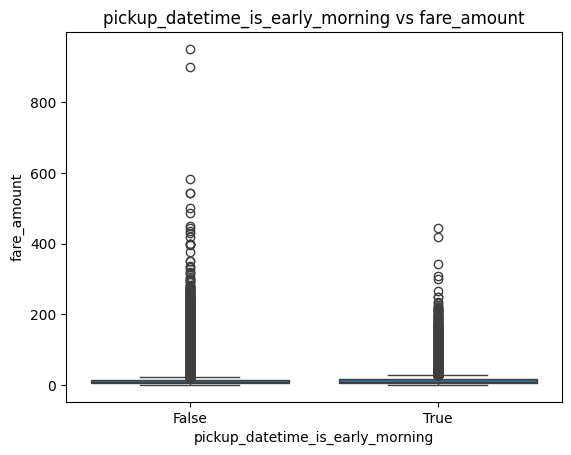

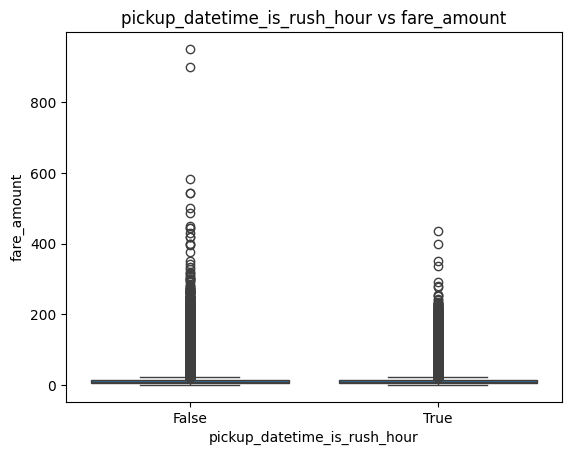

In [21]:
bool_cols = df.select_dtypes(include=bool).columns
target = "fare_amount"

for col in bool_cols:
    sns.boxplot(x=df[col], y=df[target])
    plt.title(f"{col} vs {target}")
    plt.xlabel(col)
    plt.ylabel(target)
    plt.show()

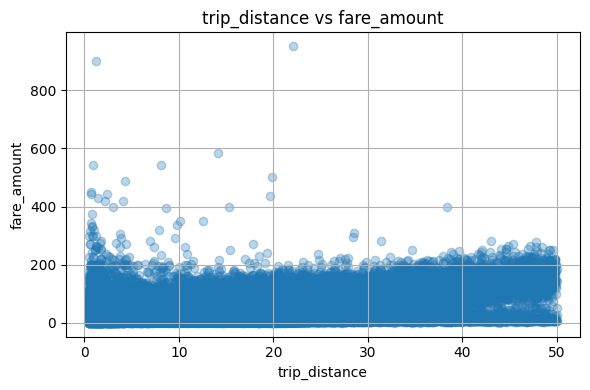

In [22]:
features = [
    'trip_distance',
]

target = 'fare_amount'
for feature in features:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[feature], df[target], alpha=0.3)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs {target}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Exporting the preprocessed dataset

In [24]:
df.columns

Index(['id', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'pickup_datetime_dayofyear', 'pickup_datetime_month',
       'pickup_datetime_year', 'pickup_datetime_hour',
       'pickup_datetime_dayofweek', 'pickup_datetime_is_weekend',
       'pickup_datetime_is_late_night', 'pickup_datetime_is_night',
       'pickup_datetime_is_early_morning', 'pickup_datetime_is_rush_hour',
       'trip_distance'],
      dtype='object')

In [ ]:
df.to_csv('../data/eda/df_preprocessed.csv', index=False)